In [431]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Hotel Booking Cancellation Prediction"))

# Hotel Booking Cancellation Prediction

In [432]:
from IPython.display import display, Markdown

# Display the heading and explanation
text = """
# 1. Data Pre-Processing

### Dropping Irrelevant Columns
- **Company and Agent Columns**: These columns have a high proportion of missing values, with `company` missing 112,593 entries and `agent` missing 16,340 entries. Keeping them could introduce noise and negatively impact the model's performance due to the lack of complete information.

### Handling Missing Values
- **Filling Missing Values**: Missing values in the `children`, `agent`, and `company` columns were replaced with 0 because these represent scenarios where there were no children, no agent involved, or no associated company. For instance, when there are no children, it's logical to fill these missing values with 0 rather than imputing a mean, as children counts are non-continuous and should remain accurate to the real number of guests.

### Removing Inconsistent Values
- **Removing Rows with Zero Guests**: Rows where `adults`, `children`, and `babies` were all zero were removed from the dataset since they represent incomplete or invalid bookings (i.e., reservations made without any guests). Such records do not contribute to meaningful insights regarding booking patterns.
"""

display(Markdown(text))



# 1. Data Pre-Processing

### Dropping Irrelevant Columns
- **Company and Agent Columns**: These columns have a high proportion of missing values, with `company` missing 112,593 entries and `agent` missing 16,340 entries. Keeping them could introduce noise and negatively impact the model's performance due to the lack of complete information.

### Handling Missing Values
- **Filling Missing Values**: Missing values in the `children`, `agent`, and `company` columns were replaced with 0 because these represent scenarios where there were no children, no agent involved, or no associated company. For instance, when there are no children, it's logical to fill these missing values with 0 rather than imputing a mean, as children counts are non-continuous and should remain accurate to the real number of guests.

### Removing Inconsistent Values
- **Removing Rows with Zero Guests**: Rows where `adults`, `children`, and `babies` were all zero were removed from the dataset since they represent incomplete or invalid bookings (i.e., reservations made without any guests). Such records do not contribute to meaningful insights regarding booking patterns.


In [433]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\Hassan Shoaib\Downloads\hotel_bookings.csv"
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [434]:
df.isnull().values.any()

True

In [435]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [436]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# 1.1 Handling Missing Values"))

# 1.1 Handling Missing Values

In [437]:
# Get information about the dataset (data types, missing values, etc.)
df.info()

# Get a statistical summary of the numerical columns
df.describe()

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [438]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Unique Values  "))

# Unique Values  

In [439]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [440]:
# Get unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

hotel: ['Resort Hotel' 'City Hotel']
is_canceled: [0 1]
lead_time: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 

In [441]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# 1.Removing Inconsistent values and Outliers "))

# 1.Removing Inconsistent values and Outliers 

In [442]:
df.fillna(0, inplace = True)

In [443]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [444]:
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [445]:
df['children'].value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [446]:
df['adults'].value_counts()

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [447]:
len(df[df['adults']== 0])

403

In [448]:
len(df[df['babies']== 0])

118473

In [449]:
filter = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [450]:

data = df[~filter]

In [451]:
data.shape

(119210, 32)

In [452]:
# Step 1: Checking the unique values in the 'adults' column
adults_value_counts = df['adults'].value_counts()

# Step 2: Get the unique values in 'adults' column
unique_adults = df['adults'].unique()

# Step 3: Filter rows where adults, children, and babies are all zero
filter_no_guests = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)
rows_with_no_guests = df[filter_no_guests]

# Step 4: Exclude the filtered rows (with no guests) from the dataset
cleaned_data = df[~filter_no_guests]

# Print the results
print(adults_value_counts)
print(unique_adults)
print(f"Number of rows with no guests: {len(rows_with_no_guests)}")
print(f"Shape of cleaned data: {cleaned_data.shape}")
adults_value_counts, unique_adults, len(rows_with_no_guests), cleaned_data.shape

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
Number of rows with no guests: 180
Shape of cleaned data: (119210, 32)


(adults
 2     89680
 1     23027
 3      6202
 0       403
 4        62
 26        5
 27        2
 20        2
 5         2
 40        1
 50        1
 55        1
 6         1
 10        1
 Name: count, dtype: int64,
 array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
       dtype=int64),
 180,
 (119210, 32))

In [453]:
print(adults_value_counts)
print(unique_adults)
print(f"Number of rows with no guests: {len(rows_with_no_guests)}")
print(f"Shape of cleaned data: {cleaned_data.shape}")

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
Number of rows with no guests: 180
Shape of cleaned data: (119210, 32)


In [454]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Column Data Type Conversion"))

# Column Data Type Conversion

In [455]:
# Convert reservation_status_date to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [456]:
from IPython.display import display, Markdown

# Exploratory Data Analysis Section
eda_justification = """
# 2. Exploratory Data Analysis (EDA)

## Insights for Hotel Management
- **Cancellation Percentages**: Calculating cancellation percentages for City and Resort hotels helps the management understand which type of hotel faces more cancellations, enabling targeted actions to minimize cancellations.
- **Most Frequently Ordered Meal Types**: Identifying the most frequently ordered meal types allows the hotel to ensure sufficient inventory and improve customer satisfaction.
- **Returning Guests**: Determining the number of returning guests helps the hotel understand customer loyalty and identify patterns in guest retention.
- **Most Booked Room Types**: Finding the most booked room types helps the hotel optimize room availability and pricing strategies.
- **Correlation Between Room Types and Cancellations**: Exploring correlations between room types and cancellations can provide insights into whether certain rooms are more likely to be canceled, helping management improve booking policies.
- **Country of our home guests**: By understanding where most of their guests are coming from, the hotel can focus its marketing efforts more effectively on countries that generate the highest number of bookings.
These insights were visualized using suitable chart types, such as bar charts, pie charts, line charts, and heatmaps to effectively communicate findings to stakeholders.
"""
display(Markdown(eda_justification))


# 2. Exploratory Data Analysis (EDA)

## Insights for Hotel Management
- **Cancellation Percentages**: Calculating cancellation percentages for City and Resort hotels helps the management understand which type of hotel faces more cancellations, enabling targeted actions to minimize cancellations.
- **Most Frequently Ordered Meal Types**: Identifying the most frequently ordered meal types allows the hotel to ensure sufficient inventory and improve customer satisfaction.
- **Returning Guests**: Determining the number of returning guests helps the hotel understand customer loyalty and identify patterns in guest retention.
- **Most Booked Room Types**: Finding the most booked room types helps the hotel optimize room availability and pricing strategies.
- **Correlation Between Room Types and Cancellations**: Exploring correlations between room types and cancellations can provide insights into whether certain rooms are more likely to be canceled, helping management improve booking policies.
- **Country of our home guests**: By understanding where most of their guests are coming from, the hotel can focus its marketing efforts more effectively on countries that generate the highest number of bookings.
These insights were visualized using suitable chart types, such as bar charts, pie charts, line charts, and heatmaps to effectively communicate findings to stakeholders.


In [457]:
data.head(2)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [458]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [459]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [460]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
City = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]


In [461]:
resort.shape

(28927, 32)

In [462]:
City.shape

(46084, 32)

In [463]:
resort['country'].value_counts().index

Index(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU',  'CN', 'NLD',     0, 'USA',
       ...
       'MKD', 'SMR', 'BDI', 'SYR', 'CYM', 'UGA', 'COM', 'MUS', 'BIH', 'SAU'],
      dtype='object', name='country', length=119)

In [464]:
labels = resort['country'].value_counts().index
values = resort['country'].value_counts()

In [465]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Displaying Guest Country Wise  "))

# Displaying Guest Country Wise  

In [466]:
import plotly.graph_objs as go 
from plotly.offline import iplot 
import plotly.express as px

In [467]:


# Step 2:  unique values in 'hotel' and 'is_canceled' columns
print("Unique Hotels:", data['hotel'].unique())
print("Unique Cancellation Status:", data['is_canceled'].unique())

# Step 3:  DataFrames for Resort and City Hotels
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

#  the shapes of the DataFrames
print("Resort DataFrame Shape:", resort.shape)
print("City DataFrame Shape:", city.shape)

# Step 4: labels and values for the pie chart
labels = resort['country'].value_counts().index  # Unique countries
values = resort['country'].value_counts().values  # Counts for each country

# Step 5: Creating the pie chart
trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', textinfo='value')



Unique Hotels: ['Resort Hotel' 'City Hotel']
Unique Cancellation Status: [0 1]
Resort DataFrame Shape: (28927, 32)
City DataFrame Shape: (46084, 32)


In [468]:
iplot([trace])

In [469]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [470]:
country_data = data[data['is_canceled'] == 0] ['country'].value_counts().reset_index()
country_data.columns = ['country', 'no of guests']
country_data

,country,no of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [471]:
!pip install folium


In [472]:
#map graph 
import folium
from folium.plugins import HeatMap

In [473]:
b = folium.Map()

In [474]:
country_data.dtypes

country         object
no of guests     int64
dtype: object

In [475]:
guests = px.choropleth(country_data,
                       locations = country_data ['country'],
                       color = country_data['no of guests'],
                      hover_name = country_data['country'],
                      title = "Home Country Of Our Guests" )

In [476]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Displaying Guest's Country Using Heat Map "))

# Displaying Guest's Country Using Heat Map 

In [477]:
guests.show()

In [478]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [479]:
#how much are guest paying per night
data2 = data[data['is_canceled'] == 0]

In [480]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [481]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [482]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Price Of Room Per NIght "))

# Price Of Room Per NIght 

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt




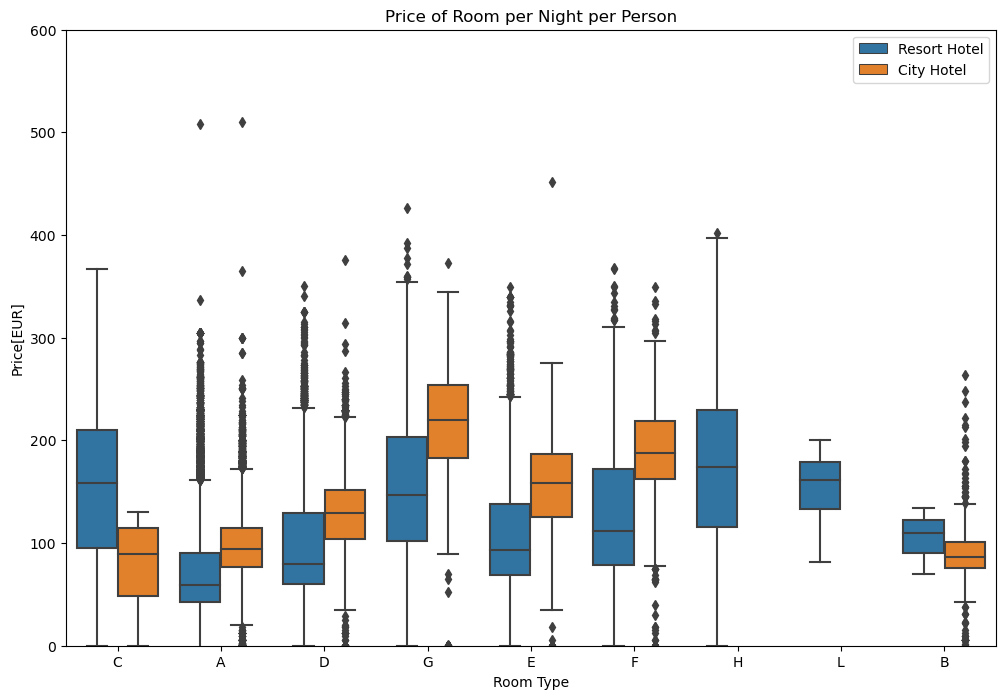

In [484]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)
plt.title("Price of Room per Night per Person")
plt.xlabel("Room Type")
plt.ylabel("Price[EUR]")
plt.legend(loc = 'upper right')
plt.ylim(0, 600)
plt.show()

In [485]:
data_resort =[ resort['is_canceled'] == 0]

In [486]:
data_city =[ city['is_canceled'] == 0]

In [487]:
data_city

[40060     True
 40066     True
 40070     True
 40071     True
 40072     True
           ... 
 119385    True
 119386    True
 119387    True
 119388    True
 119389    True
 Name: is_canceled, Length: 46084, dtype: bool]

In [488]:
data_resort

[0        True
 1        True
 2        True
 3        True
 4        True
          ... 
 40055    True
 40056    True
 40057    True
 40058    True
 40059    True
 Name: is_canceled, Length: 28927, dtype: bool]

In [489]:
data_resort = data[data['hotel'] == 'Resort Hotel']


In [490]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,77.849496
1,August,186.790574
2,December,69.051887
3,February,55.189716
4,January,49.507033
5,July,155.181299
6,June,110.481032
7,March,57.554652
8,May,78.758134
9,November,48.313643


In [491]:
data_city = data[data['hotel'] == 'City Hotel']

In [492]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.397415
1,August,114.857330
2,December,89.209560
3,February,85.327519
4,January,82.754477
5,July,110.945950
6,June,119.186056
7,March,92.973339
8,May,121.764614
9,November,88.372486


In [493]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by hotel type, arrival month, and calculating the mean ADR
resort_adr = data_resort.groupby('arrival_date_month')['adr'].mean().reset_index()
city_adr = data_city.groupby('arrival_date_month')['adr'].mean().reset_index()

In [494]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

resort_adr['arrival_date_month'] = pd.Categorical(resort_adr['arrival_date_month'], categories=months, ordered=True)
city_adr['arrival_date_month'] = pd.Categorical(city_adr['arrival_date_month'], categories=months, ordered=True)

In [495]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("Displaying Booking Trends each Month Using Line Chart "))

Displaying Booking Trends each Month Using Line Chart 

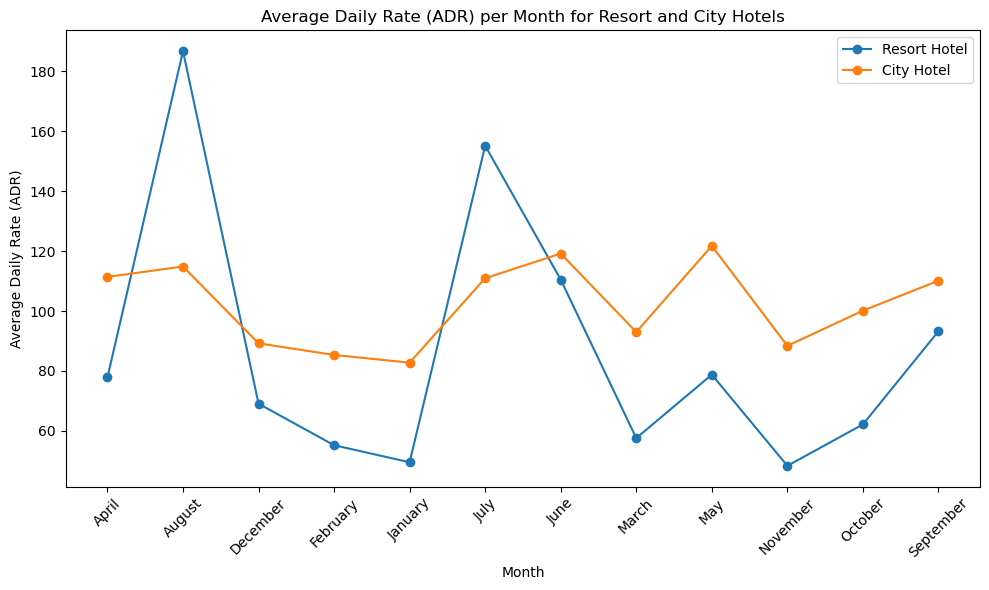

In [496]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(resort_adr['arrival_date_month'], resort_adr['adr'], label='Resort Hotel', marker='o')
plt.plot(city_adr['arrival_date_month'], city_adr['adr'], label='City Hotel', marker='o')
plt.title('Average Daily Rate (ADR) per Month for Resort and City Hotels')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [497]:
#Goal: Compare cancellation percentages for City Hotel and Resort Hotel to see which hotel faces more cancellations.
#Why it's important: High cancellation rates can cause financial losses.
#Understanding which hotel has a higher cancellation percentage helps the management address the issue.
# Calculate cancellation percentage for each hotel
resort_cancel_rate = data_resort['is_canceled'].mean() * 100
city_cancel_rate = data_city['is_canceled'].mean() * 100

In [498]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Calculating Cancellation Percentages for City and Resort Hotels "))

# Calculating Cancellation Percentages for City and Resort Hotels 

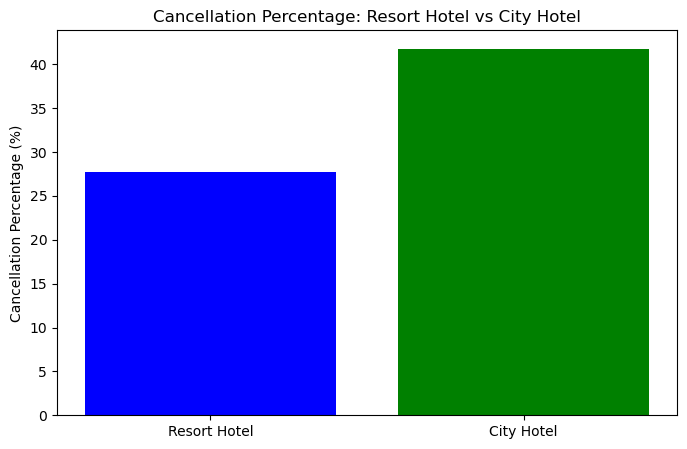

In [499]:
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(['Resort Hotel', 'City Hotel'], [resort_cancel_rate, city_cancel_rate], color=['blue', 'green'])
plt.title('Cancellation Percentage: Resort Hotel vs City Hotel')
plt.ylabel('Cancellation Percentage (%)')
plt.show()

In [500]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Identifying the Most Frequently Ordered Meal Types "))

# Identifying the Most Frequently Ordered Meal Types 

In [501]:
#Goal: Identify which meal type is the most frequently ordered by guests.
#Why it's important: Understanding guest preferences can help hotels plan their menu and services more efficiently,
# catering to popular demands.
# Counting occurrences of each meal type
meal_counts = data['meal'].value_counts()

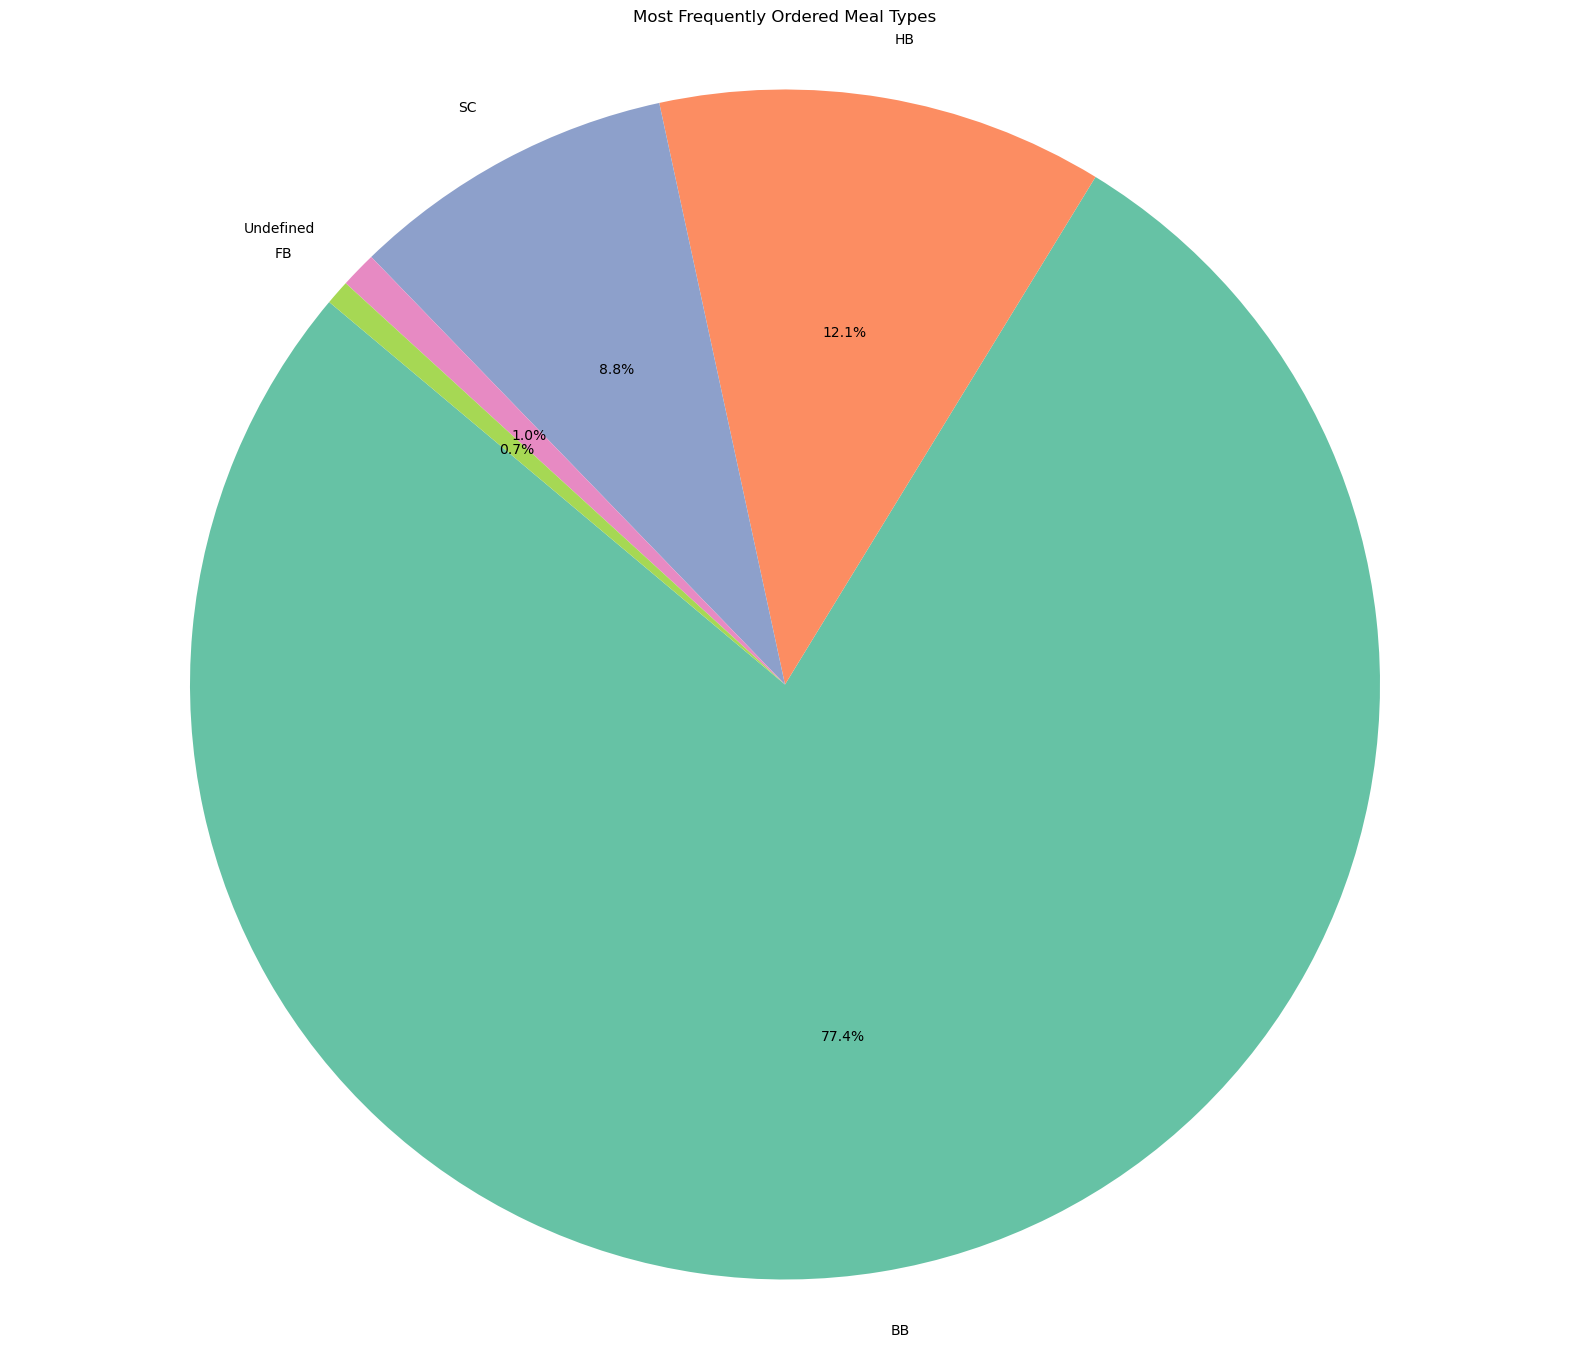

In [502]:
# Plotting a pie chart
plt.figure(figsize=(20, 17))
plt.pie(meal_counts, labels=meal_counts.index, autopct='%1.1f%%', startangle=140,  # Change startangle to rotate
colors=sns.color_palette('Set2'), labeldistance=1.1)
plt.title('Most Frequently Ordered Meal Types')
plt.axis('equal')
plt.show()



In [503]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Exploring Correlations Between Room Types and Cancellations "))

# Exploring Correlations Between Room Types and Cancellations 

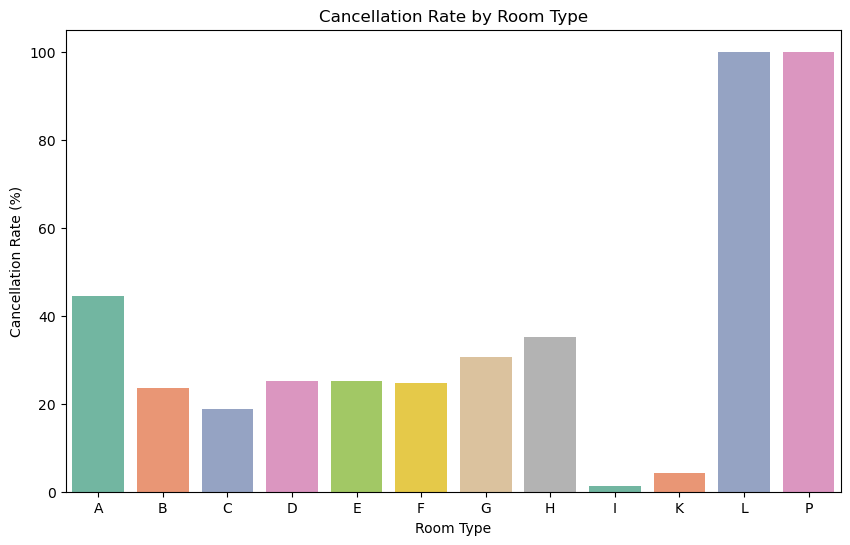

In [504]:
# Grouping by room type and cancellation status
room_cancellation = df.groupby('assigned_room_type')['is_canceled'].mean() * 100  # Assuming 'is_canceled' is 1 for canceled bookings

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=room_cancellation.index, y=room_cancellation.values, palette='Set2')
plt.title('Cancellation Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()



In [505]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Discovering No. of returning Guest vs New Guest "))

# Discovering No. of returning Guest vs New Guest 

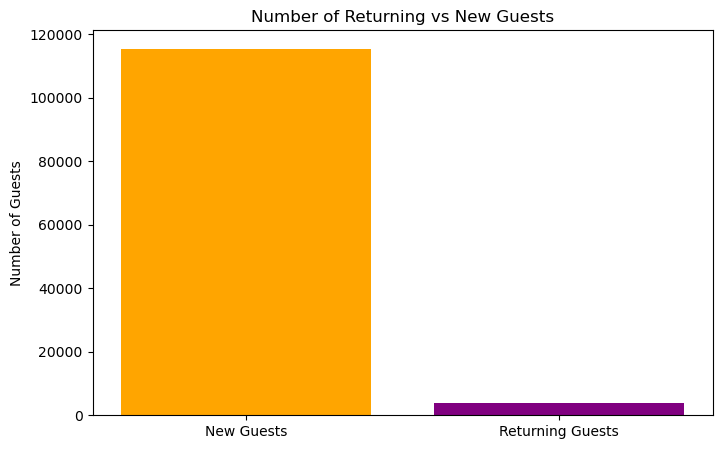

In [506]:
# Counting returning vs new guests
returning_guests = data['is_repeated_guest'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(8, 5))
plt.bar(['New Guests', 'Returning Guests'], returning_guests, color=['orange', 'purple'])
plt.title('Number of Returning vs New Guests')
plt.ylabel('Number of Guests')
plt.show()


In [507]:
# Grouping by 'assigned_room_type' and counting the number of occurrences
room_counts = df['assigned_room_type'].value_counts()

In [508]:
# Displaying the most booked room type
most_booked_room_type = room_counts.idxmax()
most_booked_room_count = room_counts.max()

In [509]:
print(f"The most booked room type is: {most_booked_room_type} with {most_booked_room_count} bookings.")

The most booked room type is: A with 74053 bookings.


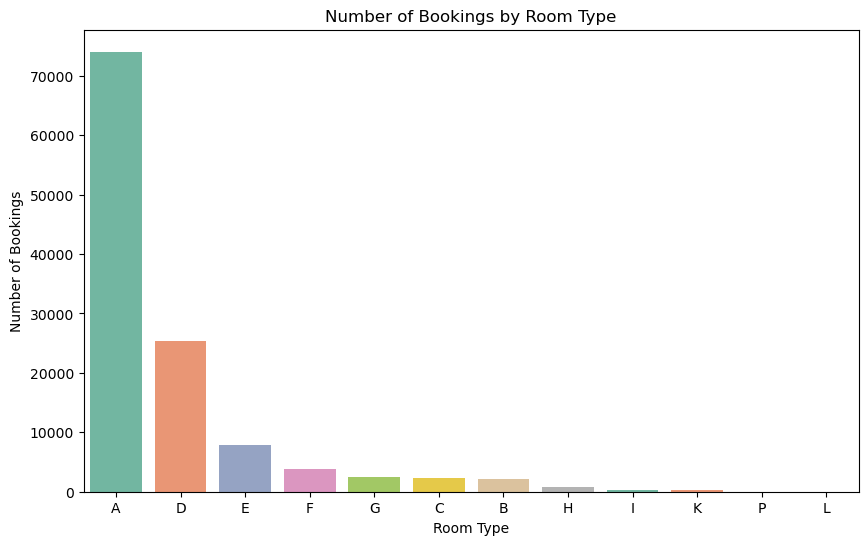

In [510]:
# Optionally, you can visualize it using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=room_counts.index, y=room_counts.values, palette='Set2')
plt.title('Number of Bookings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.show()

In [511]:
from IPython.display import display, Markdown

# Feature Engineering Section
feature_engineering_justification = """
# 3. Feature Engineering

## A. Encoding
- **One-Hot Encoding**:If these features were encoded using a numeric label (e.g., assigning numbers 1, 2, 3 to different categories), the model might mistakenly interpret these values as having a natural order, which could negatively impact its predictions by introducing bias. One-hot encoding addresses this issue by representing each category as a binary column, ensuring that no false ordinal relationship is inferred and preserving the correct nature of the categorical information. This allows the model to effectively learn without assuming relationships that do not exist.

## B. Binning
- **Binning `lead_time` and `adr`**: `For lead_time, binning into 'short', 'medium', and 'long' helps capture different booking behaviors that might correlate with cancellation rates (e.g., longer lead times might indicate higher cancellation probabilities). Similarly, binning adr (average daily rate) into 'Low', 'Medium', and 'High' can help to categorize guests into different spending levels, which might reveal patterns in cancellations or preferences.

## C. Scaling
- **Standard Scaling**: Scaling was applied to numerical features to standardize them, which ensures that features with larger ranges do not dominate the model. This is especially important for distance-based algorithms or models sensitive to the scale of input features.

## D. Feature Selection
- **Selecting Relevant Features**: The selection of features like lead_time, is_repeated_guest, previous_cancellations, booking_changes, adr, and encoded categorical columns was driven by their importance in predicting whether a booking would be canceled. This selection was made based on domain knowledge, as these features have a logical relationship with customer behavior and cancellations. For instance, lead_time can indicate the risk of cancellation—longer times may increase the likelihood of change. By selecting only the most informative features, the model's complexity is reduced, which helps prevent overfitting and makes the model more efficient, thereby enhancing its predictive accuracy.
"""
display(Markdown(feature_engineering_justification))


# 3. Feature Engineering

## A. Encoding
- **One-Hot Encoding**:If these features were encoded using a numeric label (e.g., assigning numbers 1, 2, 3 to different categories), the model might mistakenly interpret these values as having a natural order, which could negatively impact its predictions by introducing bias. One-hot encoding addresses this issue by representing each category as a binary column, ensuring that no false ordinal relationship is inferred and preserving the correct nature of the categorical information. This allows the model to effectively learn without assuming relationships that do not exist.

## B. Binning
- **Binning `lead_time` and `adr`**: `For lead_time, binning into 'short', 'medium', and 'long' helps capture different booking behaviors that might correlate with cancellation rates (e.g., longer lead times might indicate higher cancellation probabilities). Similarly, binning adr (average daily rate) into 'Low', 'Medium', and 'High' can help to categorize guests into different spending levels, which might reveal patterns in cancellations or preferences.

## C. Scaling
- **Standard Scaling**: Scaling was applied to numerical features to standardize them, which ensures that features with larger ranges do not dominate the model. This is especially important for distance-based algorithms or models sensitive to the scale of input features.

## D. Feature Selection
- **Selecting Relevant Features**: The selection of features like lead_time, is_repeated_guest, previous_cancellations, booking_changes, adr, and encoded categorical columns was driven by their importance in predicting whether a booking would be canceled. This selection was made based on domain knowledge, as these features have a logical relationship with customer behavior and cancellations. For instance, lead_time can indicate the risk of cancellation—longer times may increase the likelihood of change. By selecting only the most informative features, the model's complexity is reduced, which helps prevent overfitting and makes the model more efficient, thereby enhancing its predictive accuracy.


In [512]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Encoding "))

# Encoding 

In [513]:
# Dropping irrelevant columns
df = df.drop(['company', 'agent'], axis=1)

# One-hot encoding categorical columns (e.g., meal type, hotel type)
df_encoded = pd.get_dummies(df, columns=['meal', 'hotel'])


In [514]:
# Convert reservation status date to datetime format if not already
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract the month from the date
df['booking_month'] = df['reservation_status_date'].dt.month



In [515]:
# Count bookings by month
most_booked_month = df['booking_month'].value_counts().idxmax()
print(f"The month with the most bookings is: {most_booked_month}")


The month with the most bookings is: 7


In [516]:
room_type_columns = [col for col in df_encoded.columns if 'room_type' in col]
print(f"Encoded room type columns: {room_type_columns}")


Encoded room type columns: ['reserved_room_type', 'assigned_room_type']


In [517]:
# Check if booking_month exists
if 'booking_month' not in df_encoded.columns:
    # If not, add it to df_encoded
    df_encoded['booking_month'] = df['reservation_status_date'].dt.month


In [518]:
# Include the 'booking_month' as one of the relevant features
selected_features = ['lead_time', 'is_repeated_guest', 'previous_cancellations', 'booking_changes', 'adr', 'reserved_room_type', 'assigned_room_type', 'booking_month']

# Selecting the relevant features from the dataframe
X = df_encoded[selected_features]

#Including the month in which the most bookings occurred can help identify seasonal trends in booking cancellations, as certain months may have higher cancellation rates due to holidays or peak seasons. It adds context to the time element of the booking behavior.

In [519]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Binning "))

# Binning 

In [520]:
# Binning lead_time into categories (short, medium, long)
bins = [0, 30, 90, 300]
labels = ['short', 'medium', 'long']
df_encoded['lead_time_binned'] = pd.cut(df_encoded['lead_time'], bins=bins, labels=labels)


In [521]:
# One-hot encoding categorical columns ('reserved_room_type', 'assigned_room_type', and any other categorical features)
df_encoded = pd.get_dummies(df_encoded, columns=['reserved_room_type', 'assigned_room_type', 'booking_month'], drop_first=True)


In [522]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Feature Selection "))

# Feature Selection 

In [523]:
# Now select the relevant features including the encoded ones
selected_features = ['lead_time', 'is_repeated_guest', 'previous_cancellations', 'booking_changes', 'adr'] + list(df_encoded.columns[df_encoded.columns.str.startswith('reserved_room_type_')]) + list(df_encoded.columns[df_encoded.columns.str.startswith('assigned_room_type_')]) + list(df_encoded.columns[df_encoded.columns.str.startswith('booking_month_')])

X = df_encoded[selected_features]

In [524]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Scaling "))

# Scaling 

In [525]:
from sklearn.preprocessing import StandardScaler

# Scaling the features after encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [526]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Classifier Training Started from Here"))


# Classifier Training Started from Here

In [527]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Data Spliting"))

# Data Spliting

In [528]:
# Define the target variable (is_canceled column)
y = df_encoded['is_canceled']

# Now split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [529]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Model Training"))

# Model Training

In [530]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [531]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Model Evaluation"))

# Model Evaluation

In [532]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
y_pred = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.8645615210654158


In [533]:
from IPython.display import display, Markdown

# Display the heading
display(Markdown("# Feature Importance"))

# Feature Importance

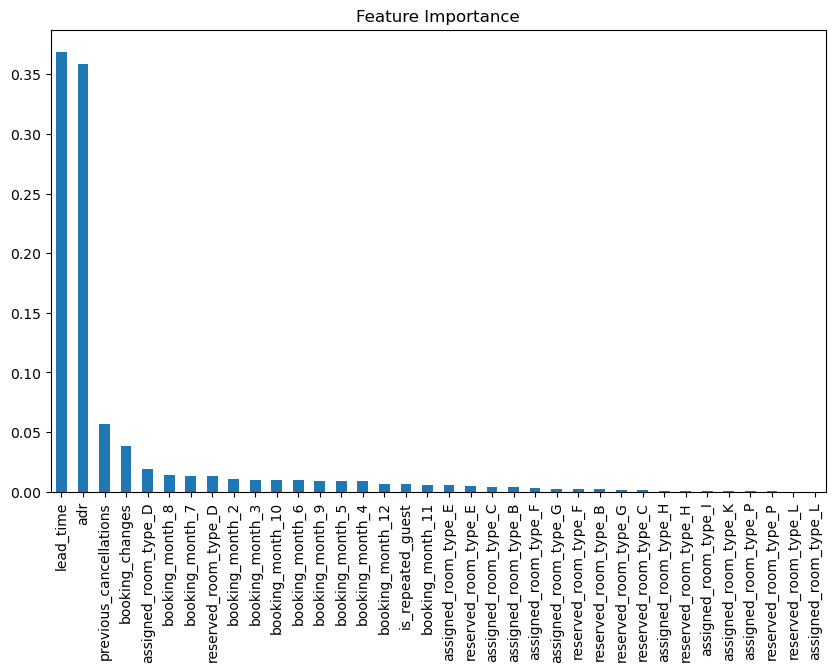

In [534]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
features = selected_features

# Creating a bar plot for feature importance
import pandas as pd
import matplotlib.pyplot as plt

# Sort feature importance values
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()
